In [1]:
module TSG1dim

using Combinatorics
using Plots
gr()

export TSG, DEPOT, visualize, naive, fast

const DEPOT = 0.0

struct TSG
    points::Array{Float64, 1}
end

function visualize(game)
    f = plot(ylim=(-1, 1), size=(300, 100))
    scatter!(f, [DEPOT, DEPOT], [0, 0], label=nothing, color=:red)
    scatter!(f, game.points, [0 for _ in 1:length(game.points)], marker=:square, color=:blue, label=nothing)
    f
end

"""
    naive computation of the Shapley values of the given TSG
"""
function naive(game)
    n = length(game.points)
    values = zeros(n)
    
    # cost pre-processing for all subsets on {1,...,n}
    dictcost = Dict()
    dictcost[[]] = 0.0
    for N in powerset(collect(1:n), 1)
        cn = maximum([game.points[j] for j in N])
        dictcost[N] = 2 * cn
    end
    
    
    # computation
    for i in 1:length(game.points)
        Ns = [j for j in 1:n if j != i]
        valuei = 0.0
        for S in powerset(Ns)
            Si = sort([S; i])
            c1 = dictcost[Si]
            c2 = dictcost[S]
            valuei += factorial(length(S)) * factorial(n - length(S) - 1) / factorial(n) * (c1 - c2)
        end
        values[i] = valuei
    end

    values
end

"""
    compute the Shapley values of TSG using (Littlechild and Owen 1973, Alibizuri et al. 2015)
"""
function fast(game)
    n = length(game.points)
    values = zeros(n)
    
    # relative distance
    r = zeros(n)
    r[1] = game.points[1]
    for j in 2:n
        r[j] = game.points[j] - game.points[j - 1]
    end

    for k in 1:n
        for j in 1:k
            values[k] += (2 * r[j]) / (n - j + 1)
        end
    end
    values
end



end

using Main.TSG1dim

TSG([1.5, 2.5, 3.5])


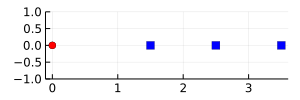

In [2]:
tsg = TSG([1.5, 2.5, 3.5])
println(tsg)
TSG1dim.visualize(tsg)

In [3]:
println(TSG1dim.naive(tsg))

[1.0, 1.9999999999999998, 3.9999999999999996]


In [4]:
TSG1dim.fast(tsg)

3-element Vector{Float64}:
 1.0
 2.0
 4.0